In [31]:
# Name: Sumeet Shivgand
# Student Id: R00182850
# Subject: Applied Machine Learning

#### Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import string
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from collections import Counter
from sklearn.model_selection import train_test_split

### Preprocessiong

In [32]:
np.random.seed(850)

In [3]:
rootdir = "D:\\CIT\\Semester 2\\Applied Machine Learning\\Assignment 1\\enron1"

# Reading 'ham' emails and creating dataframe 'ham' (non-spam = 0)
ham_list = []
spam_list = []

for directories, subdirs, files in os.walk(rootdir):
    if(os.path.split(directories)[1] == 'ham'):
        for filename in files:
            with open(os.path.join(directories, filename), encoding= "latin-1") as f:
                data = f.read()
                ham_list.append(data)


    if(os.path.split(directories)[1] == 'spam'):
        for filename in files:
            with open(os.path.join(directories, filename), encoding= "latin-1") as f:
                data = f.read()
                spam_list.append(data)         
                

ham = pd.DataFrame(ham_list, columns=["Emails"])
ham["target"] = 0
#print(ham)

spam = pd.DataFrame(spam_list, columns=["Emails"])
spam["target"] = 1
#print(spam)              
                
                

In [4]:
#Merging both 'ham' and 'spam' dataset
emails = pd.concat([ham, spam])
emails.head(5)

# Shuffle the data
# The frac keyword argument specifies the fraction of rows to return in the random sample, so frac=1 means return 
#all rows (in random order). If you wish to shuffle your dataframe in-place and reset the index,reset_index(drop = true)
# Here, specifying drop=True prevents .reset_index from creating a column containing the old index entries.

emails = emails.sample(frac=1).reset_index(drop=True)
emails.head()

,Emails,target
0,"Subject: from mrs . juliana\ndear friend ,\npl...",1
1,Subject: he ' s gone for the night\nyou ' ve g...,1
2,Subject: cheap soft cialis tabs\nthese pills a...,1
3,"Subject: re : fbw , attention smallcap stox pl...",1
4,Subject: meeting tommorow at 11 - 00\nremove\n...,1


In [5]:
# Print the shape(Get the number of rows and columns)
print(emails.shape)

# Get the column names
print(emails.columns)

# Check for duplicates and remove them
emails.drop_duplicates(inplace = True)
print(emails.shape)

# Show the number of missing (NAN, NaN, na) data for each column
emails.isnull().sum()

(5172, 2)
Index(['Emails', 'target'], dtype='object')
(4994, 2)


Emails    0
target    0
dtype: int64

### Training and Test Splits

In [6]:
## Train and Test Splits

X_train, X_test = train_test_split(emails, test_size=0.30, random_state=0)

train_set = X_train
test_set = X_test

train_set.to_csv(r'C:\\Users\\shivgandsumeet\\train_set.csv',header = True)
test_set.to_csv(r'C:\\Users\\shivgandsumeet\\test_set.csv', header = True)

#print(type(train_set))
#print(train_set.head())


train_stats = pd.crosstab(index= train_set["target"], columns="count") 
print(train_stats)

test_stats = pd.crosstab(index= test_set["target"], columns="count") 
print(test_stats)

col_0   count
target       
0        2475
1        1020
col_0   count
target       
0        1056
1         443


### Feature Extraction

In [7]:
# Feature Extraction
# Remove punctuation, stopwords and return clean text words

def process_text(Emails):
    nopunc = [char for char in Emails if char not in string.punctuation]
    nopunc = ''.join(nopunc).split()
    
    clean_words = [word.lower() for word in nopunc if word.lower() not in stopwords.words('english')]
    return clean_words

# Show Tokenization (a list of tokens also called lemmas)
emails['Emails'].head().apply(process_text)


0    [subject, mrs, juliana, dear, friend, please, ...
1    [subject, gone, night, got, check, new, site, ...
2    [subject, cheap, soft, cialis, tabs, pills, li...
3    [subject, fbw, attention, smallcap, stox, play...
4    [subject, meeting, tommorow, 11, 00, remove, h...
Name: Emails, dtype: object

In [8]:

# Convert a collection of text to a matrix of tokens

bagofwords = CountVectorizer(process_text).fit(emails['Emails'])
print(len(bagofwords.vocabulary_))
print(bagofwords)
# After the counting, the term weighting and normalization can be done with TF-IDF, 
#using scikit-learn's TfidfTransformer.
messages_bow = bagofwords.transform(emails['Emails'])
#print(messages_bow)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(messages_bow)

messages_tfidf=tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)



50463
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8',
                input=<function process_text at 0x000001FCA01AA1E0>,
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
(4994, 50463)


### Exploratory Data Analysis

<class 'pandas.core.series.Series'>
[('ect', 9350), ('subject', 5450), ('hou', 4896), ('enron', 4317), ('2000', 3049), ('please', 2195), ('com', 2064), ('gas', 2025), ('deal', 1976), ('3', 1920), ('1', 1857), ('meter', 1694), ('cc', 1590), ('hpl', 1583), ('2', 1567), ('pm', 1548), ('00', 1545), ('000', 1466), ('10', 1450), ('2001', 1342)]


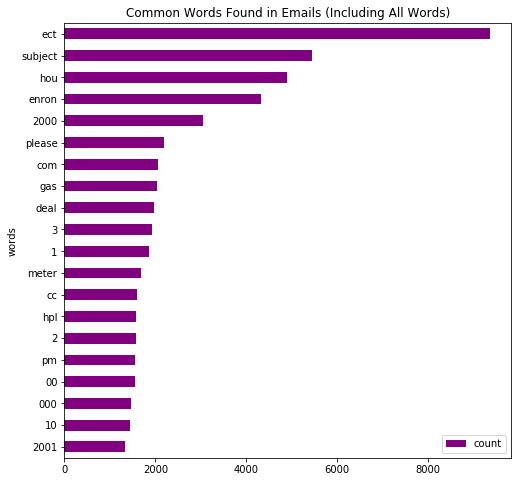

In [9]:
### Exploratory Data Analysis


# Show Tokenization (a list of tokens also called lemmas)
abc = train_set['Emails'].apply(process_text)
print(type(abc))

email_list = abc.values.tolist()
#print(email_list)

###############################


final_list = list(itertools.chain.from_iterable(email_list))
#print(final_list)
############################

word_counts = Counter(final_list)
#top_20 = word_counts.most_common(20)
#print(top_20)
###########################

wg = collections.Counter(final_list)
top_20 = word_counts.most_common(20)
print(top_20)
wg.most_common(20)
########################

clean_wg = pd.DataFrame(wg.most_common(20),
                             columns=['words', 'count'])

clean_wg.head()
#############################

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_wg.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Emails (Including All Words)")

plt.show()

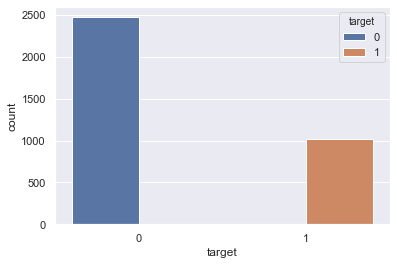

In [10]:
#sns.countplot(emails['target'])
sns.set(style="darkgrid")
sns.countplot( data=train_set, x="target",hue = "target")

### Supervised Classification

In [11]:
# Split the data into 70% training and 30% testing

X_train, X_test, y_train, y_test = train_test_split(messages_tfidf, emails['target'], test_size = 0.30, random_state = 0) 

In [12]:
## Supervised Model Selection
# Create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
## Supervised Model Selection
# Evaluate the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
#print(classification_report(y_test, pred))
print('Accuracy Score: \n', accuracy_score(y_test, pred))
confusion_test = confusion_matrix(y_test, pred)
pd.DataFrame(data = confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

#### We misclassify 237 spam messages as non-spam emails whereas we don't misclassify any non-spam message.

Accuracy Score: 
 0.8579052701801201


,Predicted 0,Predicted 1
Actual 0,1056,0
Actual 1,213,230


In [14]:
# Import pickle module to save the model to the disk
import pickle
with open('ClassifierNB_pickle','wb') as f:
    pickle.dump(classifier,f)

# load save model into python from disk
#with open('ClassifierNB_pickle','rb') as f:
#    cp = pickle.load(f)


### Model Selection

,Accuracy
0.05,0.977985


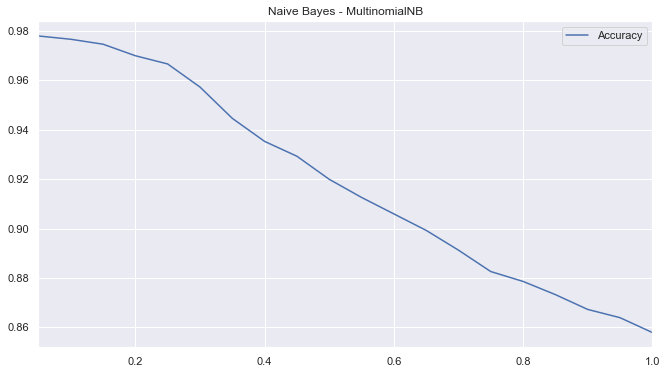

In [25]:
#from sklearn.naive_bayes import MultinomialNB
pred_scores = []
for i in np.linspace(0.05, 1, num=20):
    classifier = MultinomialNB(alpha=i)
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    pred_scores.append((i, [accuracy_score(y_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Accuracy'])
df.plot(figsize=(11,6))
plt.title('Naive Bayes - MultinomialNB')

df[df['Accuracy'] == df['Accuracy'].max()]

,Accuracy
5,0.941294


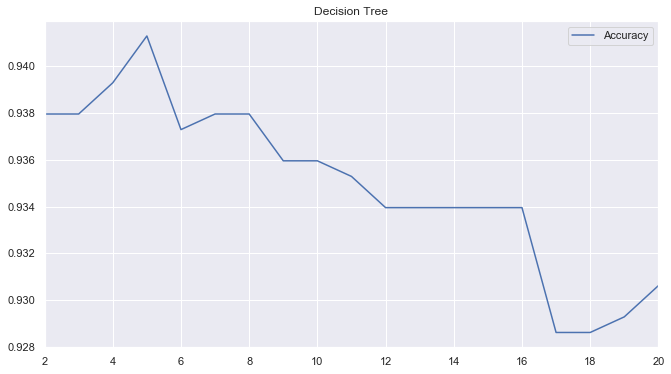

In [24]:

from sklearn.tree import DecisionTreeClassifier
pred_scores = []

for i in range(2,21):
    dtc = DecisionTreeClassifier(min_samples_split=i, random_state=111)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    pred_scores.append((i, [accuracy_score(y_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Accuracy'])
df.plot(figsize=(11,6))
plt.title('Decision Tree')

df[df['Accuracy'] == df['Accuracy'].max()]

In [17]:
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)

clfs = {'NB': mnb, 'DT': dtc}

def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

def predict_labels(clf, messages_tfidf):
    return (clf.predict(messages_tfidf))

In [18]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, X_train, y_train)
    pred = predict_labels(v,X_test)
    pred_scores.append((k, [accuracy_score(y_test,pred)]))

In [19]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df

C:\Users\shivgandsumeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score
NB,0.969980
DT,0.937959


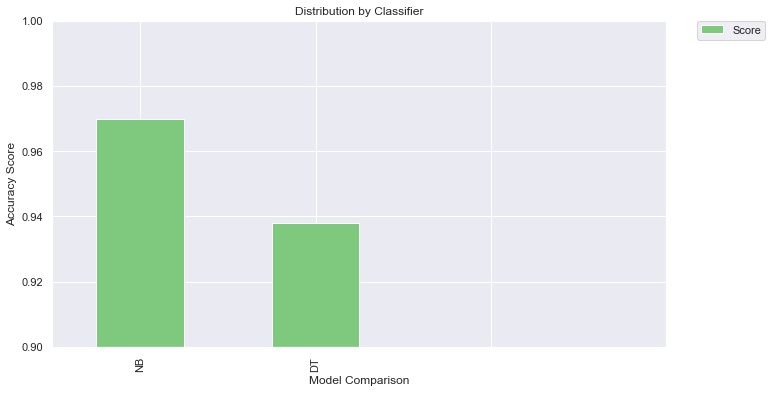

In [20]:
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(4), df.index)
plt.ylabel('Accuracy Score')
plt.xlabel('Model Comparison')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Model Evaluation

In [21]:
# Evaluate the model on the test data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1056
           1       1.00      0.52      0.68       443

    accuracy                           0.86      1499
   macro avg       0.92      0.76      0.80      1499
weighted avg       0.88      0.86      0.84      1499




Roc_auc_score for DecisionTree:  0.9226231701894794


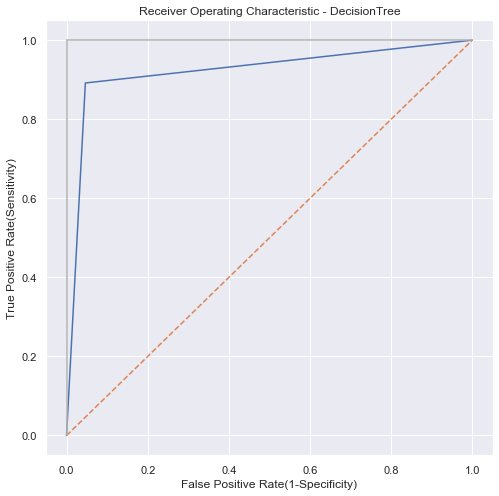

Roc_auc_score for Naive Bayes(MultinimialNB):  0.9966118578562145


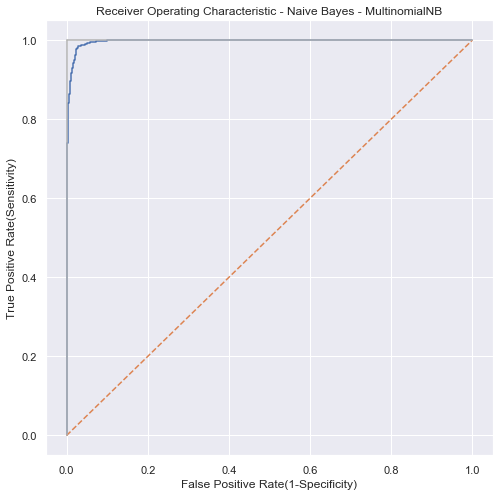

In [33]:
def model_evaluation():
    print()
    
    import warnings
    warnings.filterwarnings("ignore")

    # load libraries
    from sklearn.datasets import make_classification
    from sklearn.metrics import roc_curve, roc_auc_score
    import matplotlib.pyplot as plt

    # Create classifier
    clf1 = DecisionTreeClassifier(); 
    clf2 = MultinomialNB();
    
    # Train model
    clf1.fit(X_train, y_train); 
    clf2.fit(X_train, y_train);
        
    # Get predicted probabilities
    y_score1 = clf1.predict_proba(X_test)[:,1]
    y_score2 = clf2.predict_proba(X_test)[:,1]
    
    # Plot Receiving Operating Characteristic Curve
    # Create true and false positive rates
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
    false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
    #false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
    print('Roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
    
    
    # Plot ROC curves
    plt.subplots(1, figsize=(8,8))
    plt.title('Receiver Operating Characteristic - DecisionTree')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate(Sensitivity)')
    plt.xlabel('False Positive Rate(1-Specificity)')
    plt.show()

    print('Roc_auc_score for Naive Bayes(MultinimialNB): ', roc_auc_score(y_test, y_score2))
    plt.subplots(1, figsize=(8,8))
    plt.title('Receiver Operating Characteristic - Naive Bayes - MultinomialNB')
    plt.plot(false_positive_rate2, true_positive_rate2)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate(Sensitivity)')
    plt.xlabel('False Positive Rate(1-Specificity)')
    plt.show()
    
model_evaluation()